## Linear Regression ANN
#### Creating a model that will predict data that follows an exponential curve

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### Loading the data

In [4]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-06-09 22:04:57--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-06-09 22:04:57 (49.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [5]:
!ls

moore.csv  sample_data


In [12]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [ ]:
df = pd.read_csv("moore.csv", header = None)

In [14]:
df

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100
...,...,...
157,2017,18000000000
158,2017,19200000000
159,2018,8876000000
160,2018,23600000000


#### Reshaping the data for an ANN to evaluate

In [42]:
x = df[0].values
x= x.reshape(-1,1) #similarly can be done by x.reshape(162,1)

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974],
       [1974],
       [1974],
       [1975],
       [1976],
       [1976],
       [1976],
       [1978],
       [1978],
       [1979],
       [1979],
       [1979],
       [1981],
       [1982],
       [1982],
       [1983],
       [1984],
       [1984],
       [1985],
       [1985],
       [1985],
       [1986],
       [1986],
       [1986],
       [1987],
       [1987],
       [1987],
       [1987],
       [1988],
       [1988],
       [1989],
       [1989],
       [1989],
       [1989],
       [1990],
       [1991],
       [1991],
       [1992],
       [1992],
       [1993],
       [1993],
       [1994],
       [1994],
       [1995],
       [1999],
       [1995],
       [1996],
       [1997],
       [1997],
       [1997],
       [1998],
       [1999],
       [1999],
       [2000],
       [2000],
       [1999],
       [1999],
       [1999],
       [2000],
       [2001],
       [2001],
       [2002],
       [20

In [43]:
y = df[1].values
y.shape

(162,)

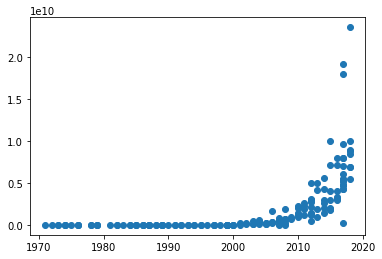

In [63]:
plt.scatter(x, y)
#the graph is exponential, but we can make the relationship linear if we take the log of y

In [ ]:
y = np.log(y)

#### Splitting the data and scaling it

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [ ]:
scale = StandardScaler()

In [ ]:
x_train = scale.fit_transform(x_train)

In [ ]:
x_test = scale.transform(x_test)

#### Building the model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (1,)),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(0.0001, 0.9), loss ="mse")

In [69]:
r = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 19ms/step - loss: 2492382028813565952.0000 - val_loss: 2434320668041412608.0000
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 2479774478733672448.0000 - val_loss: 2415408243409944576.0000
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 2458186117678104576.0000 - val_loss: 2389155204273537024.0000
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 2429711790175682560.0000 - val_loss: 2358486251562074112.0000
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 2397943600714350592.0000 - val_loss: 2325288147228819456.0000
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 2363675121811456000.0000 - val_loss: 2291064748302663680.0000
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 2329226048123699200.0000 - val_loss: 2256247200780648448.0000
Epoch 8/100
4/4 [==============================] - 0s 9ms/step 

#### Evaluating our model

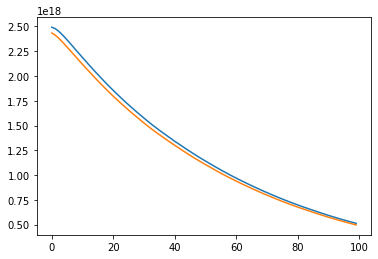

In [70]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

#### Retraining model with Learning Rate callback

In [71]:
def calendar(epoch):
  if epoch >50:
    return 0.0001
  return 0.001
calendar = tf.keras.callbacks.LearningRateScheduler(calendar)
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, callbacks=[calendar])

Epoch 1/100
4/4 [==============================] - 0s 10ms/step - loss: 501580265240395776.0000 - val_loss: 473344394322247680.0000 - lr: 0.0010
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 471022775520198656.0000 - val_loss: 432011725009584128.0000 - lr: 0.0010
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 426205719499374592.0000 - val_loss: 382687667747291136.0000 - lr: 0.0010
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 374464179764985856.0000 - val_loss: 332886388078804992.0000 - lr: 0.0010
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 324597891471507456.0000 - val_loss: 284517531543142400.0000 - lr: 0.0010
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 276293631243976704.0000 - val_loss: 240105233240293376.0000 - lr: 0.0010
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 232157499338260480.0000 - val_loss: 200651405961199616.0000 -

#### Additional Info

In [74]:
print(model.layers[0].get_weights())
layer = model.layers[0]

[array([[1676515.2]], dtype=float32), array([1631688.6], dtype=float32)]


1